In [130]:
library(ggplot2)
library(dplyr)

options(repr.plot.height=4,repr.plot.width=6)

Cargar los datos en un dataframe llamado: airbnb

In [131]:
airbnb<-read.csv('data//airbnb.csv',sep = ',', stringsAsFactors = T)

Mostrar las primeras 6 filas del dataframe

In [132]:
head(airbnb)

,Zipcode,Neighbourhood.Cleansed,Property.Type,Room.Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed.Type,Amenities,Square.Feet,Price,Review.Scores.Rating
,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>
1,28004,Universidad,Apartment,Private room,2,2,1,1,Real Bed,"TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron",NA,35,NA
2,28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96
3,28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91
4,28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100
5,28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90
6,28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95


Renombrar las columnas de la siguiente forma:

| Nombre original | Nuevo nombre |
| - | - |
| Zipcode | CodigoPostal |
| Neighbourhood.Cleansed | Barrio |
| Property.Type	| TipoPropiedad |
| Room.Type | TipoAlquiler |
| Accommodates | MaxOcupantes |
| Bathrooms	| NumBanyos |
| Bedrooms	| NumDormitorios |
| Beds	|  NumCamas |
| Bed.Type	| TipoCama |
| Amenities | Comodidades |
| Square.Feet | PiesCuadrados |
| Price	| Precio |
| Review.Scores.Rating | Puntuacion |

In [133]:
newnames<-c("CodigoPostal","Barrio","TipoPropiedad","TipoAlquiler","MaxOcupantes","NumBanyos",
"NumDormitorios","NumCamas","TipoCama","Comodidades","PiesCuadrados","Precio","Puntuacion")
names(airbnb) <- newnames

In [134]:
head(airbnb)

,CodigoPostal,Barrio,TipoPropiedad,TipoAlquiler,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,TipoCama,Comodidades,PiesCuadrados,Precio,Puntuacion
,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>
1,28004,Universidad,Apartment,Private room,2,2,1,1,Real Bed,"TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron",NA,35,NA
2,28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96
3,28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91
4,28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100
5,28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90
6,28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95


Crea una nueva columna llamada MetrosCuadrados a partir de la columna PiesCuadrados.

Ayuda: 1 pie cuadrado son 0,092903 metros cuadrdados

In [135]:
airbnb['MetrosCuadrados'] <- airbnb['PiesCuadrados'] * 0.092903

In [136]:
head(airbnb)

,CodigoPostal,Barrio,TipoPropiedad,TipoAlquiler,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,TipoCama,Comodidades,PiesCuadrados,Precio,Puntuacion,MetrosCuadrados
,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<dbl>
1,28004,Universidad,Apartment,Private room,2,2,1,1,Real Bed,"TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron",NA,35,NA,NA
2,28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96,NA
3,28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91,NA
4,28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100,NA
5,28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90,49.98181
6,28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95,NA


Miremos el código postal. Es una variable con entradas erroneas.
Hay valores como '', '-'  y '28' que deberían ser considerados como NA.
Así mismo también debería ser NA todos los que no compiencen por 28, ya que estamos con códigos postales de Madrid

El código postal 28002, 28004 y 28051 tienen entradas repetidas. 
Por ejemplo las entradas 28002\n20882 deberían ir dnetro de 28002

El codigo 2804 debería ser 28004, 2805 deberia ser 28005 y 2815 juncto con 2815 debería ser 28015

Limpia los datos de la columna Codigo Postal

In [138]:
levels(airbnb$CodigoPostal)

levels(airbnb$CodigoPostal)[levels(airbnb$CodigoPostal) %in% c('')] <- NA
levels(airbnb$CodigoPostal)[levels(airbnb$CodigoPostal) %in% c('-')] <- NA
levels(airbnb$CodigoPostal)[levels(airbnb$CodigoPostal) %in% c('28')] <- NA
levels(airbnb$CodigoPostal)[levels(airbnb$CodigoPostal) %in% c('Madrid 28004')] <- '28004'
levels(airbnb$CodigoPostal)[levels(airbnb$CodigoPostal) %in% c('2804')] <- '28004'
levels(airbnb$CodigoPostal)[levels(airbnb$CodigoPostal) %in% c('2805')] <- '28005'
levels(airbnb$CodigoPostal)[levels(airbnb$CodigoPostal) %in% c('2815')] <- '28015'
levels(airbnb$CodigoPostal)[levels(airbnb$CodigoPostal) %in% c('280013')] <- '28013'

levels(airbnb$CodigoPostal)[!startsWith(levels(airbnb$CodigoPostal), '28')] <- NA

z <- grepl("\n", levels(airbnb$CodigoPostal), fixed=TRUE)
levels(airbnb$CodigoPostal)[z] <- substr(levels(airbnb$CodigoPostal)[z],1,5)

levels(airbnb$CodigoPostal)

[1] "28001"  "280013" "28002"  "28003"  "28004"  "28005"  "28006"  "28007" 
 [9] "28008"  "28009"  "28010"  "28011"  "28012"  "28013"  "28014"  "28015" 
[17] "28016"  "28017"  "28018"  "28019"  "28020"  "28021"  "28022"  "28023" 
[25] "28024"  "28025"  "28026"  "28027"  "28028"  "28029"  "28030"  "28031" 
[33] "28032"  "28033"  "28034"  "28035"  "28036"  "28037"  "28038"  "28039" 
[41] "28040"  "28041"  "28042"  "28043"  "28044"  "28045"  "28046"  "28047" 
[49] "28048"  "28049"  "28050"  "28051"  "28052"  "28053"  "28054"  "28055" 
[57] "28056"  "28058"  "28060"  "28094"  "28105"  "28850"

[1] "28001" "28013" "28002" "28003" "28004" "28005" "28006" "28007" "28008"
[10] "28009" "28010" "28011" "28012" "28014" "28015" "28016" "28017" "28018"
[19] "28019" "28020" "28021" "28022" "28023" "28024" "28025" "28026" "28027"
[28] "28028" "28029" "28030" "28031" "28032" "28033" "28034" "28035" "28036"
[37] "28037" "28038" "28039" "28040" "28041" "28042" "28043" "28044" "28045"
[46] "28046" "28047" "28048" "28049" "28050" "28051" "28052" "28053" "28054"
[55] "28055" "28056" "28058" "28060" "28094" "28105" "28850"

Una vez limpios los datos ¿Cuales son los códigos postales que tenemos? 

In [139]:
table(airbnb$CodigoPostal)


28001 28013 28002 28003 28004 28005 28006 28007 28008 28009 28010 28011 28012 
  231  1020   171   185  1796  1195   218   206   338   216   384   250  2060 
28014 28015 28016 28017 28018 28019 28020 28021 28022 28023 28024 28025 28026 
  630   601    76   107    43   200   192    58    30    23    44   123    93 
28027 28028 28029 28030 28031 28032 28033 28034 28035 28036 28037 28038 28039 
  122   263   110    73    27    33    89    45    59    67    65    77   160 
28040 28041 28042 28043 28044 28045 28046 28047 28048 28049 28050 28051 28052 
   16    63    90   103    19   495    32    67     1     3    58    17     1 
28053 28054 28055 28056 28058 28060 28094 28105 28850 
   85    12    12     1     1     1     1     1     1 

¿Cuales son los 5 códigos postales con más entradas? ¿Y con menos? ¿Cuantas entradas tienen?

In [150]:
# Con más entradas y su cantidad
sort(table(airbnb$CodigoPostal),decreasing=TRUE)[1:5]

#Con menos entradas y su cantidad
sort(table(airbnb$CodigoPostal),decreasing=FALSE)[1:5]


28012 28004 28005 28013 28014 
 2060  1796  1195  1020   630 


28048 28052 28056 28058 28060 
    1     1     1     1     1 

¿Cuales son los barrios que hay en el código postal 28012?

In [146]:
airbnb[airbnb$CodigoPostal == "28012", "Barrio"]

[1] Sol             Sol             Sol             Sol            
   [5] Acacias         Sol             Sol             Sol            
   [9] Sol             <NA>            <NA>            Palos de Moguer
  [13] Embajadores     Embajadores     Embajadores     Embajadores    
  [17] Embajadores     <NA>            Embajadores     Embajadores    
  [21] Embajadores     Embajadores     Embajadores     Embajadores    
  [25] Embajadores     Embajadores     Embajadores     Embajadores    
  [29] Embajadores     Cortes          Cortes          Cortes         
  [33] Cortes          Cortes          Cortes          Embajadores    
  [37] Embajadores     Embajadores     Embajadores     Embajadores    
  [41] Embajadores     <NA>            Embajadores     <NA>           
  [45] Embajadores     Embajadores     Embajadores     Embajadores    
  [49] Embajadores     Embajadores     Embajadores     Embajadores    
  [53] Embajadores     Embajadores     Embajadores     Embajadores    
  [57] Embajadores     Embajadores     Embajadores     Embajadores    
  [61] Embajadores     Embajadores     Embajadores     Embajadores    
  [65] Embajadores     Embajadores     Embajadores     Embajadores    
  [69] Embajadores     Embajadores     Embajadores     Embajadores    
  [73] Embajadores     Embajadores     Embajadores     Cortes         
  [77] Cortes          <NA>            <NA>            <NA>           
  [81] <NA>            <NA>            <NA>            Sol            
  [85] Sol             Sol             Sol             Sol            
  [89] Sol             Sol             Palos de Moguer <NA>           
  [93] Palos de Moguer <NA>            <NA>            <NA>           
  [97] <NA>            <NA>            <NA>            Sol            
 [101] <NA>            Sol             Sol             Sol            
 [105] Sol             Sol             Sol             Sol            
 [109] Sol             <NA>            Sol             Sol            
 [113] Sol             Acacias         Cortes          <NA>           
 [117] <NA>            <NA>            <NA>            <NA>           
 [121] <NA>            <NA>            <NA>            <NA>           
 [125] <NA>            <NA>            <NA>            <NA>           
 [129] <NA>            Palacio         <NA>            Palacio        
 [133] <NA>            <NA>            Embajadores     Embajadores    
 [137] Embajadores     Embajadores     Embajadores     Embajadores    
 [141] Embajadores     Embajadores     Embajadores     Embajadores    
 [145] Embajadores     Embajadores     Embajadores     <NA>           
 [149] Embajadores     Embajadores     Embajadores     Embajadores    
 [153] Embajadores     Embajadores     Embajadores     Embajadores    
 [157] Embajadores     Embajadores     Embajadores     Embajadores    
 [161] Embajadores     Embajadores     Embajadores     Embajadores    
 [165] Embajadores     Embajadores     <NA>            Palacio        
 [169] Embajadores     Embajadores     Embajadores     Embajadores    
 [173] Embajadores     Embajadores     Embajadores     Embajadores    
 [177] Embajadores     Embajadores     Embajadores     Embajadores    
 [181] Embajadores     Embajadores     Embajadores     Embajadores    
 [185] Embajadores     Embajadores     Embajadores     Embajadores    
 [189] Embajadores     Embajadores     Embajadores     Cortes         
 [193] Cortes          Cortes          Cortes          Cortes         
 [197] Cortes          Cortes          Cortes          Cortes         
 [201] Cortes          Cortes          Cortes          Cortes         
 [205] Cortes          Embajadores     Embajadores     Embajadores    
 [209] Embajadores     Embajadores     Embajadores     Embajadores    
 [213] Embajadores     Embajadores     Embajadores     Embajadores    
 [217] Embajadores     Embajadores     Embajadores     Embajadores    
 [221] Embajadores     Embajadores     <NA>            <NA>           
 [225] <NA>            <NA>

¿Cuantas entradas hay en cada uno de esos barrios para el codigo postal 28012?

In [147]:
table(airbnb[airbnb$CodigoPostal == "28012", "Barrio"])


                    Abrantes                      Acacias 
                           0                           13 
                     Adelfas                   Aeropuerto 
                           0                            0 
                     Aguilas             Alameda de Osuna 
                           0                            0 
                     Almagro                     Almenara 
                           0                            0 
                 Almendrales                       Aluche 
                           0                            0 
                      Ambroz                      Amposta 
                           0                            0 
            Apostol Santiago                     Arapiles 
                           0                            1 
                     Aravaca                        Arcos 
                           0                            0 
                   Argüelles                       Atoc

¿Cuantos barrios hay en todo el dataset airbnb? ¿Cuales son?

In [149]:
# Cuántos barrios
length(table(airbnb[, "Barrio"]))
# Qué barrios
table(airbnb[, "Barrio"])

[1] 125


                    Abrantes                      Acacias 
                          18                          145 
                     Adelfas                   Aeropuerto 
                          51                            6 
                     Aguilas             Alameda de Osuna 
                          15                           24 
                     Almagro                     Almenara 
                         155                           62 
                 Almendrales                       Aluche 
                          45                           45 
                      Ambroz                      Amposta 
                          12                            5 
            Apostol Santiago                     Arapiles 
                          15                          182 
                     Aravaca                        Arcos 
                          16                           18 
                   Argüelles                       Atoc

¿Cuales son los 5 barrios que tienen mayor número entradas?

In [151]:
sort(table(airbnb$Barrio),decreasing=TRUE)[1:5]


Embajadores Universidad     Palacio         Sol    Justicia 
       1844        1358        1083         940         785 

¿Cuantos Tipos de Alquiler diferentes hay? ¿Cuales son? ¿Cuantas entradas en el dataframe hay por cada tipo?

In [152]:
table(airbnb$TipoAlquiler)


Entire home/apt    Private room     Shared room 
           7903            5113             191 

Muestra el diagrama de cajas del precio para cada uno de los diferentes Tipos de Alquiler

Warning message:
“Removed 9 rows containing non-finite values (stat_boxplot).”


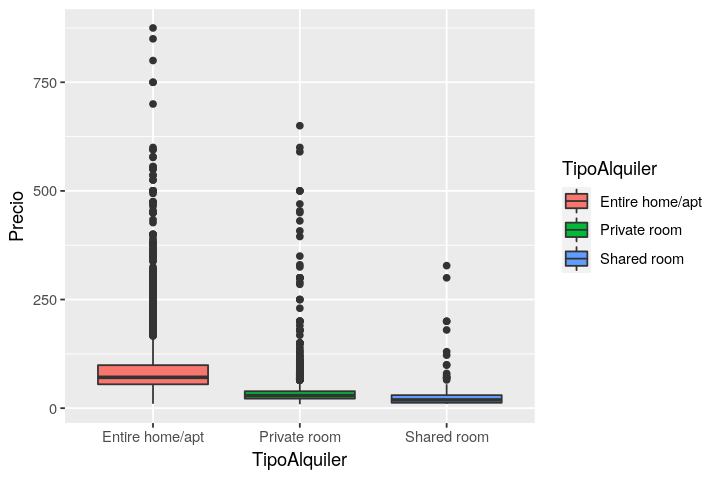

In [237]:
#boxplot(airbnb$Precio)

p1 <- ggplot(airbnb, aes(x=TipoAlquiler, y=Precio, fill=TipoAlquiler)) + 
    geom_boxplot()

p1

Cual es el precio medio de alquiler de cada uno, la diferencia que hay ¿es estadísticamente significativa?
¿Con que test lo comprobarías?

In [183]:
airbnb %>%
  group_by(TipoAlquiler) %>%
  summarise(Mean = mean(Precio, na.rm = TRUE))


TipoAlquiler,Mean
<fct>,<dbl>
Entire home/apt,87.29661
Private room,34.25514
Shared room,29.85340


Filtra el dataframe cuyos tipo de alquiler sea  'Entire home/apt' y guardalo en un dataframe llamado 
*airbnb_entire*.
Estas serán las entradas que tienen un alquiler del piso completo.

In [187]:
airbnb_entire <- airbnb[airbnb$TipoAlquiler == 'Entire home/apt',]
airbnb_entire

,CodigoPostal,Barrio,TipoPropiedad,TipoAlquiler,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,TipoCama,Comodidades,PiesCuadrados,Precio,Puntuacion,MetrosCuadrados
,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<dbl>
2,28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96,NA
3,28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91,NA
4,28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100,NA
5,28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90,49.98181
6,28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95,NA
8,28004,Universidad,Apartment,Entire home/apt,3,1,1,NA,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Elevator in building,Buzzer/wireless intercom,Heating,Washer",NA,70,84,NA
9,28015,Universidad,Apartment,Entire home/apt,2,1,1,1,Real Bed,"TV,Internet,Wireless Internet,Kitchen,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,Dryer,Essentials,Shampoo,translation missing: en.hosting_amenity_49",700,90,98,65.03210
10,28004,Universidad,Apartment,Entire home/apt,4,2,2,2,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Elevator in building,Hot tub,Heating,Family/kid friendly,Washer,Dryer,Essentials,Hair dryer,Iron",NA,155,NA,NA
11,28004,Universidad,Apartment,Entire home/apt,4,1,1,2,Real Bed,"TV,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,Essentials,Shampoo",40,70,90,3.71612


¿Cuales son los 5 barrios que tienen un mayor número de apartamentos enteros en alquiler?
Nota: Mirar solo en airbnb_entire. A partir de este punto y hasta que se diga lo contrario partiremos de airbnb_entire.

In [188]:
sort(table(airbnb_entire$Barrio),decreasing=TRUE)[1:5]


Embajadores Universidad     Palacio         Sol      Cortes 
       1228         984         769         701         574 

¿Cuales son los 5 barrios que tienen un mayor precio medio de alquiler para apartamentos enteros (es decir, del dataframe airbnb_entire)?

¿Cual es su precio medio?

Ayuda: Usa la función aggregate `aggregate(.~colname,df,mean,na.rm=TRUE)`

In [225]:
#Con aggregate
#aggregate(airbnb_entire$Precio, list(airbnb_entire$Barrio), mean, na.rm=TRUE)

#Con dplyr
precioMedioPorBarrio <- airbnb_entire %>%
  group_by(Barrio) %>%
  summarise_at(vars(Precio), list(PrecioMedio = mean))

precioMedioPorBarrio

Barrio,PrecioMedio
<fct>,<dbl>
Abrantes,46.00000
Acacias,68.16393
Adelfas,68.72727
Aeropuerto,38.00000
Aguilas,54.50000
Alameda de Osuna,138.75000
Almagro,109.18557
Almenara,65.68000
Almendrales,77.50000


¿Cuantos apartamentos hay en cada uno de esos barrios?

Mostrar una dataframe con el nombre del barrio, el precio y el número de entradas.

Ayuda: Podeis crear un nuevo dataframe con las columnas "Barrio" y "Freq" que contenga el número de entradas en cada barrio y hacer un merge con el dataframe del punto anterior.

In [226]:
#Base
#data.frame(table(airbnb_entire$Barrio))

#Con dplyr
apartamentosPorBarrio <- airbnb_entire %>%
  group_by(Barrio) %>%
  summarize(Freq=n())

totalApartamentosPorBarrioConPrecioMedio <- merge(precioMedioPorBarrio, apartamentosPorBarrio, by = "Barrio")
totalApartamentosPorBarrioConPrecioMedio

Barrio,PrecioMedio,Freq
<fct>,<dbl>,<int>
Abrantes,46.00000,3
Acacias,68.16393,61
Adelfas,68.72727,33
Aeropuerto,38.00000,2
Aguilas,54.50000,2
Alameda de Osuna,138.75000,4
Almagro,109.18557,97
Almenara,65.68000,25
Almendrales,77.50000,18


Partiendo del dataframe anterior, muestra los 5 barrios con mayor precio, pero que tengan más de 100 entradas de alquiler.

In [241]:
masDeCienEntradas <- totalApartamentosPorBarrioConPrecioMedio[totalApartamentosPorBarrioConPrecioMedio$Freq > 100,]

topMasDeCienEntradas <- head(arrange(masDeCienEntradas,desc(PrecioMedio)), n = 5)

topMasDeCienEntradas 

,Barrio,PrecioMedio,Freq
,<fct>,<dbl>,<int>
1,Goya,111.33803,142
2,Sol,100.75036,701
3,Trafalgar,98.57848,223
4,Justicia,98.25468,534
5,Cortes,94.39373,574


Dibuja el diagrama de densidad de distribución de los diferentes precios. Serían 5 gráficas, una por cada barrio.

Warning message in `==.default`(airbnb_entire$Barrio, topMasDeCienEntradas[, 1]):
“longer object length is not a multiple of shorter object length”
Warning message in is.na(e1) | is.na(e2):
“longer object length is not a multiple of shorter object length”


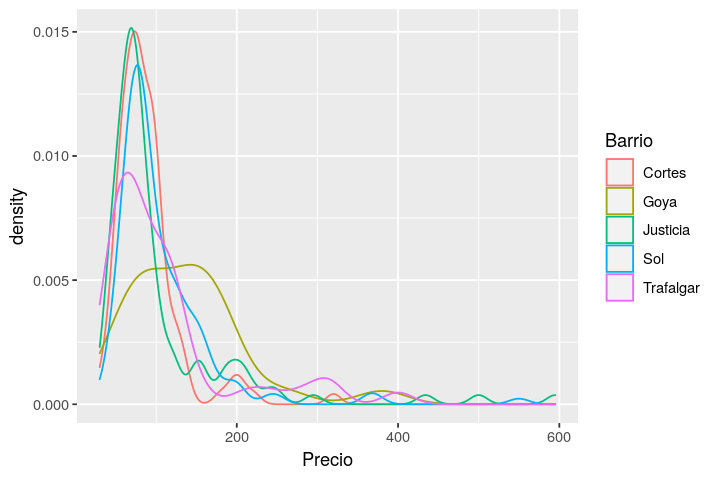

In [266]:
ggplot(airbnb_entire[airbnb_entire$Barrio == topMasDeCienEntradas[,1],], aes(x=Precio, color=Barrio))+
geom_density()

Calcula el tamaño medio, en metros cuadrados, para los 5 barrios anteriores y muestralo en el mismo dataframe junto con el precio y número de entradas

In [286]:
barriosTop <- airbnb_entire[airbnb_entire$Barrio %in% topMasDeCienEntradas$Barrio,]

metrosCuadradosMediosPorBarrio <- aggregate(barriosTop$MetrosCuadrados, list(barriosTop$Barrio), mean, na.rm=TRUE)

names(metrosCuadradosMediosPorBarrio) <- c("Barrio", "MetrosCuadradosMedios")

totalApartamentosPorBarrioConPrecioMedioConMetrosMedios <- merge(totalApartamentosPorBarrioConPrecioMedio, metrosCuadradosMediosPorBarrio, by = "Barrio")

totalApartamentosPorBarrioConPrecioMedioConMetrosMedios

Barrio,PrecioMedio,Freq,MetrosCuadradosMedios
<fct>,<dbl>,<int>,<dbl>
Cortes,94.39373,574,13.99186
Goya,111.33803,142,51.68504
Justicia,98.25468,534,28.52669
Sol,100.75036,701,45.61692
Trafalgar,98.57848,223,29.30426


Dibuja el diagrama de densidad de distribución de los diferentes tamaños de apartamentos. Serían 5 gráficas, una por cada barrio.

Warning message in `==.default`(airbnb_entire$Barrio, totalApartamentosPorBarrioConPrecioMedioConMetrosMedios[, :
“longer object length is not a multiple of shorter object length”
Warning message in is.na(e1) | is.na(e2):
“longer object length is not a multiple of shorter object length”
Warning message:
“Removed 411 rows containing non-finite values (stat_density).”


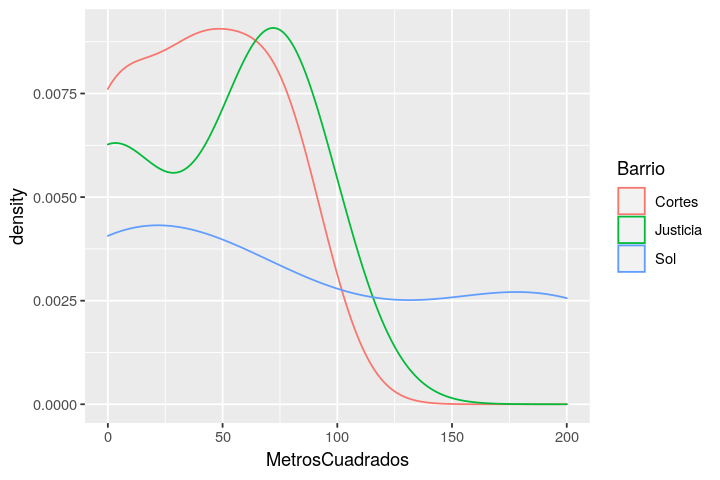

In [288]:
ggplot(airbnb_entire[airbnb_entire$Barrio == totalApartamentosPorBarrioConPrecioMedioConMetrosMedios[,1],], aes(x=MetrosCuadrados, color=Barrio))+
geom_density()

Esta claro que las medias de metros cuadrados de cada uno de estos 5 barrios parecen ser diferentes, pero ¿son estadísticamente diferentes?
¿Que test habría que usar para comprobarlo?

Para únicamente los pisos de alquiler en el barrio de Sol:

``barrio_sol<-subset(airbnb_entire,Barrio=="Sol")``

Calcular un modelo lineal que combine alguna de estas variables:
* NumBanyos
* NumDormitorios
* MaxOcupantes
* MetrosCuadrados

`geom_smooth()` using formula 'y ~ x'



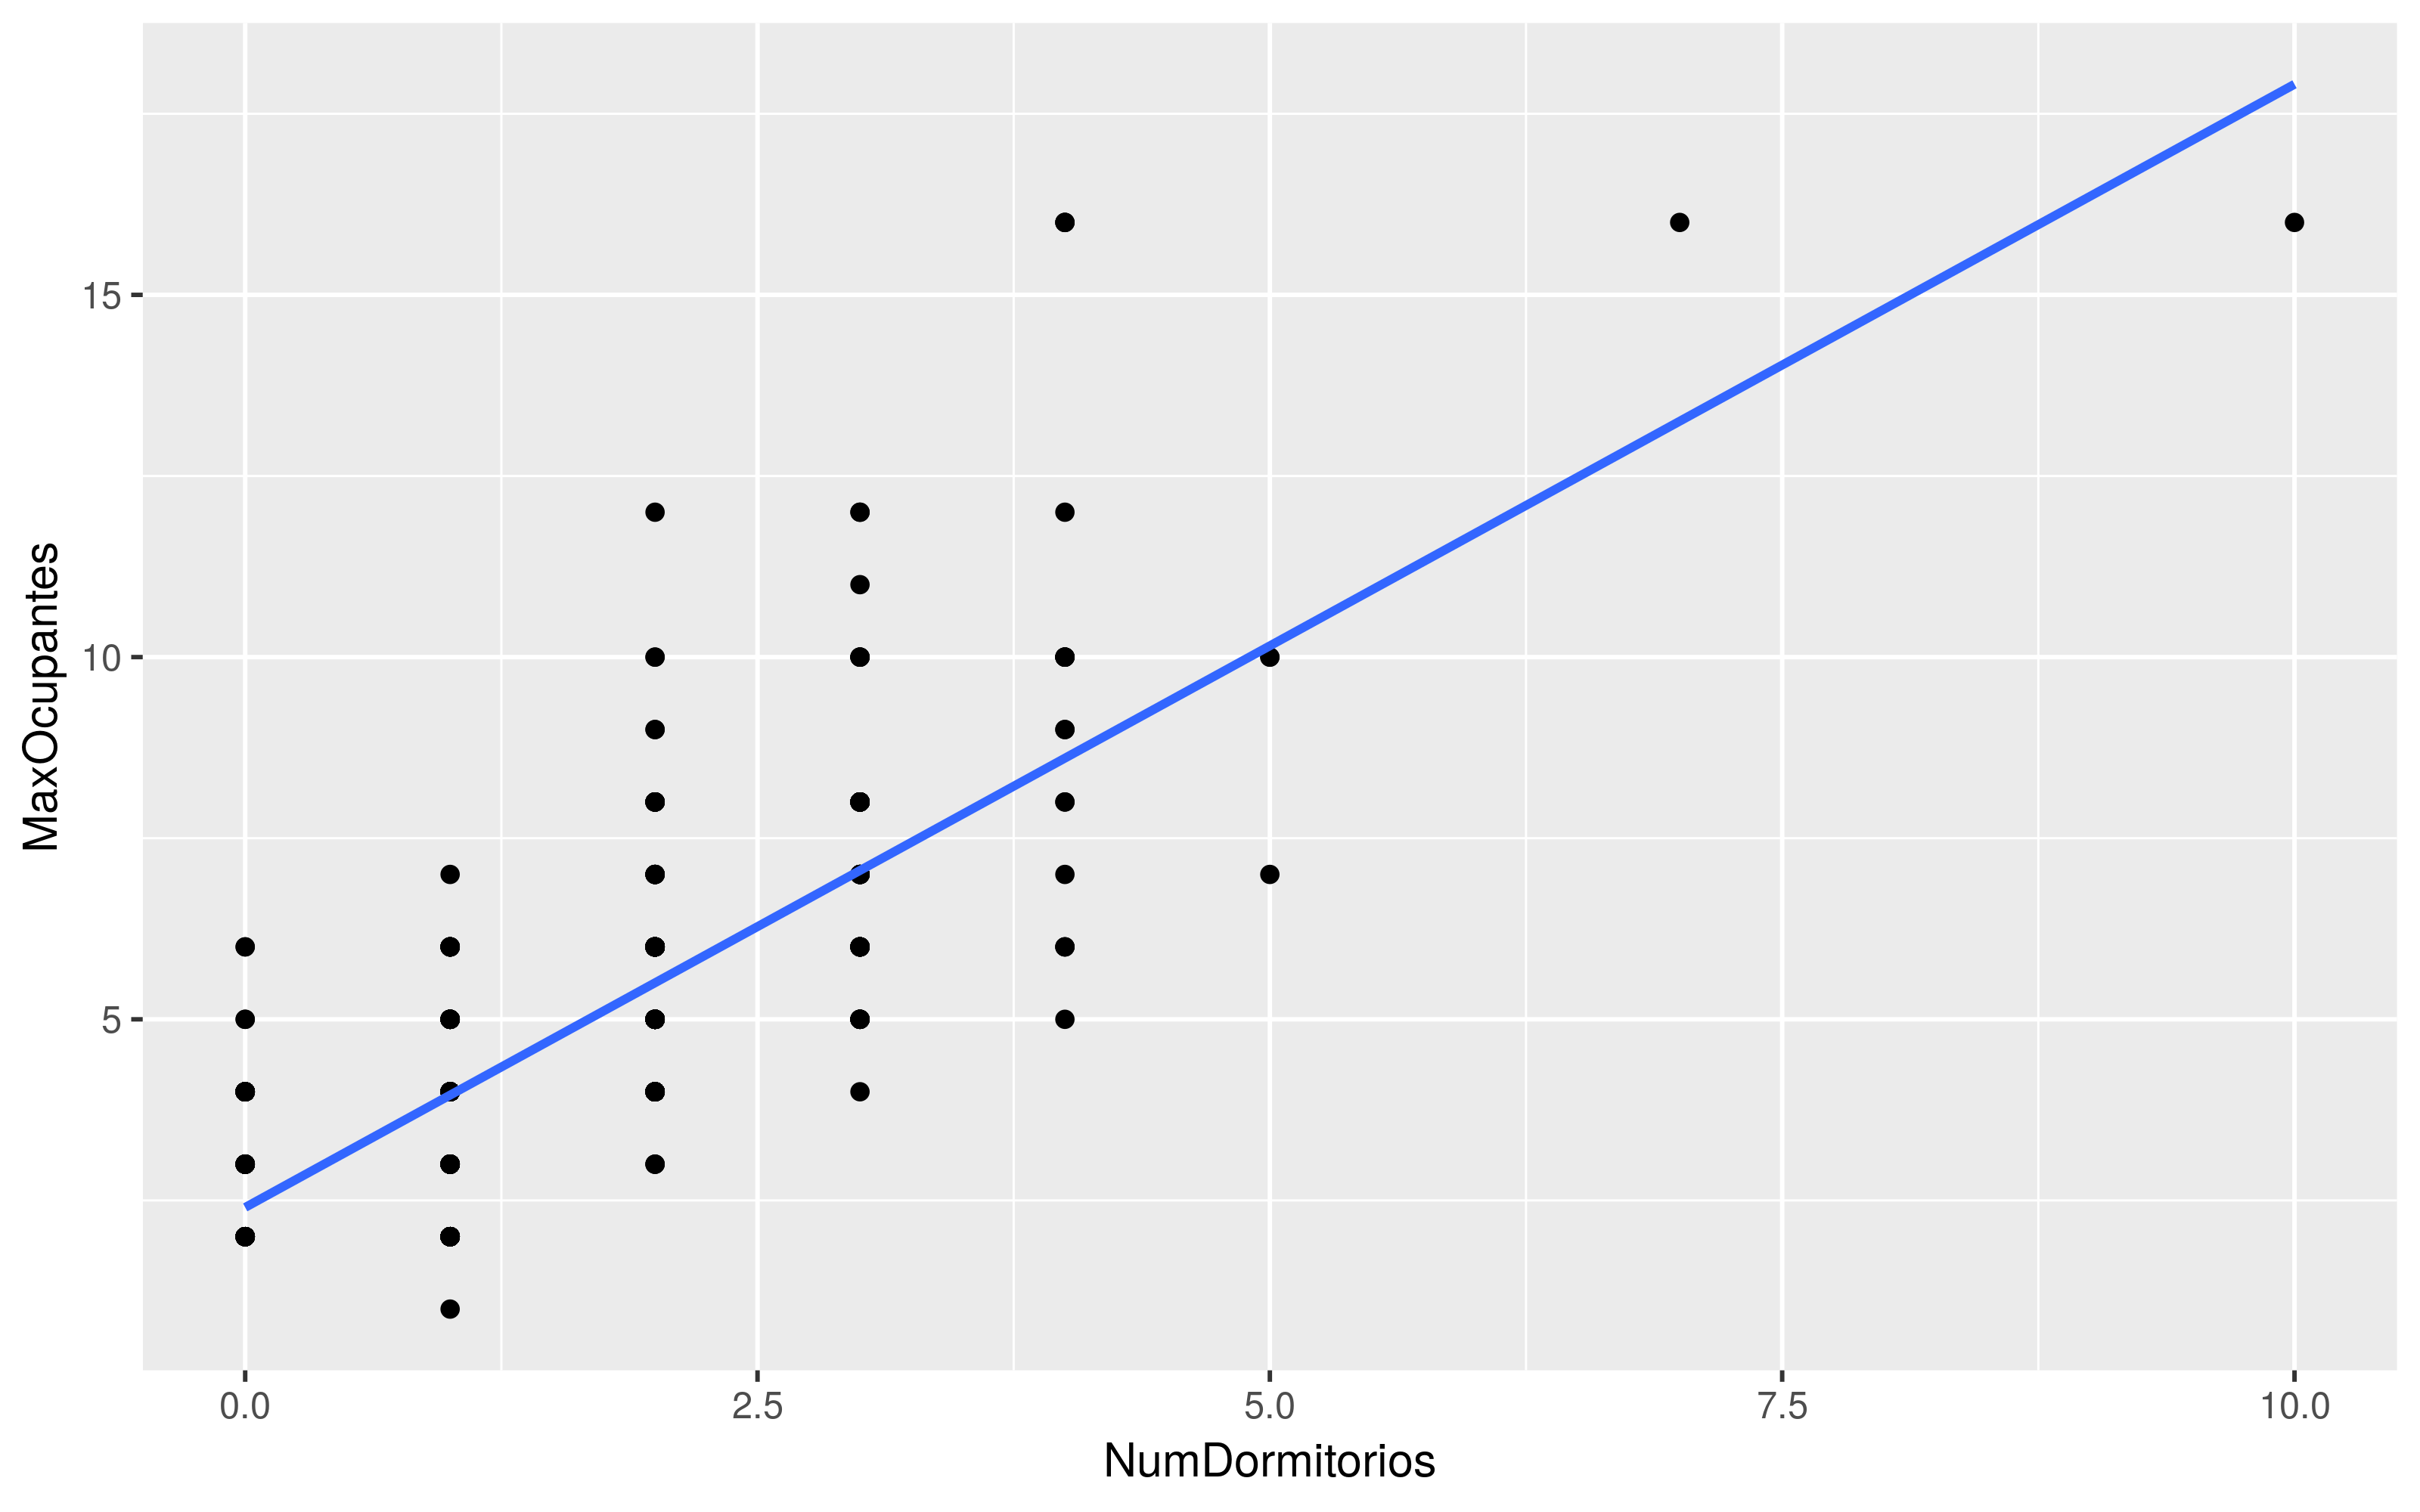

In [319]:
options(repr.plot.height=5,repr.plot.width=8 , repr.plot.res = 400)

barrio_sol<-subset(airbnb_entire,Barrio=="Sol")


p <- ggplot(barrio_sol, aes(NumDormitorios, MaxOcupantes)) +
  geom_point()+
    geom_smooth(method = lm, se = FALSE)
p


Primero calculamos la correlación para ver como se relacionan estas variables entre sí.
* NumBanyos
* NumDormitorios
* MaxOcupantes
* MetrosCuadrados

In [318]:
cr<-cor(barrio_sol$NumBanyos,barrio_sol$NumDormitorios)
paste("La correlación de las variables x,y es:",round(cr,2))

cr<-cor(barrio_sol$NumBanyos,barrio_sol$MaxOcupantes)
paste("La correlación de las variables x,y es:",round(cr,2))

cr<-cor(barrio_sol$NumBanyos,barrio_sol$MetrosCuadrados)
paste("La correlación de las variables x,y es:",round(cr,2))

cr<-cor(barrio_sol$NumDormitorios,barrio_sol$MaxOcupantes)
paste("La correlación de las variables x,y es:",round(cr,2))

cr<-cor(barrio_sol$NumDormitorios,barrio_sol$MetrosCuadrados)
paste("La correlación de las variables x,y es:",round(cr,2))

cr<-cor(barrio_sol$MaxOcupantes,barrio_sol$MetrosCuadrados)
paste("La correlación de las variables x,y es:",round(cr,2))

[1] "La correlación de las variables x,y es: 0.68"

[1] "La correlación de las variables x,y es: 0.66"

[1] "La correlación de las variables x,y es: NA"

[1] "La correlación de las variables x,y es: 0.76"

[1] "La correlación de las variables x,y es: NA"

[1] "La correlación de las variables x,y es: NA"

Se observa que la correlación entre el número de dormitorios y los metros cuadrados es sorprendentemente baja.
¿Son de fiar esos números?

Mediante un histograma o curvas de densidad podemos descartar números que notienen sentido en el dataframe barrio_sol,
para tener una matriz de correlación que tenga mayor sentido.


Una vez que hayamos filtrado los datos correspondientes calcular el valor o la combinación de valores que mejor nos permite obtener el precio de un inmueble.

¿Que variable es más fiable para conocer el precio de un inmueble, el número de habitaciones o los metros cuadrados?

Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada metro cuadrado extra del piso?

Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada habitación?

¿Cual es la probabilidad de encontrar, en el barrio de Sol, un apartamento en alquiler con 3 dormitorios?
¿Cual es el intervalo de confianza de esa probabilidad?